In [51]:
import pandas as pd
import numpy as np
%matplotlib inline

In [52]:
df = pd.read_csv('/content/sample_data/airline_passengers.csv',index_col='Month',parse_dates = True)

In [53]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [54]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [55]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [57]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [58]:
test_predictions = fitted_model.forecast(36)

In [59]:
test_predictions

1958-02-01    339.143009
1958-03-01    399.281722
1958-04-01    394.233627
1958-05-01    402.545241
1958-06-01    473.128692
1958-07-01    521.795312
1958-08-01    514.513663
1958-09-01    446.216941
1958-10-01    385.431071
1958-11-01    339.645187
1958-12-01    381.455745
1959-01-01    401.210224
1959-02-01    387.159215
1959-03-01    455.812426
1959-04-01    450.049617
1959-05-01    459.537998
1959-06-01    540.114725
1959-07-01    595.671614
1959-08-01    587.359022
1959-09-01    509.392781
1959-10-01    440.000786
1959-11-01    387.732492
1959-12-01    435.462630
1960-01-01    458.013968
1960-02-01    441.973603
1960-03-01    520.346805
1960-04-01    513.768091
1960-05-01    524.599847
1960-06-01    616.584706
1960-07-01    680.007396
1960-08-01    670.517898
1960-09-01    581.513120
1960-10-01    502.296537
1960-11-01    442.628045
1960-12-01    497.115864
1961-01-01    522.860042
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

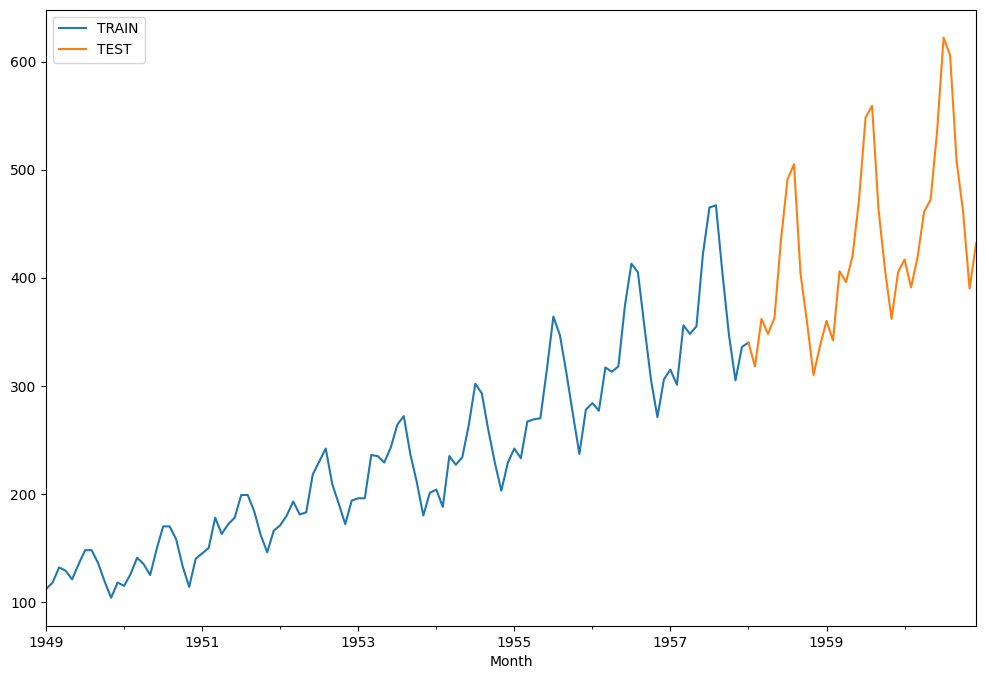

In [60]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST')

<Axes: xlabel='Month'>

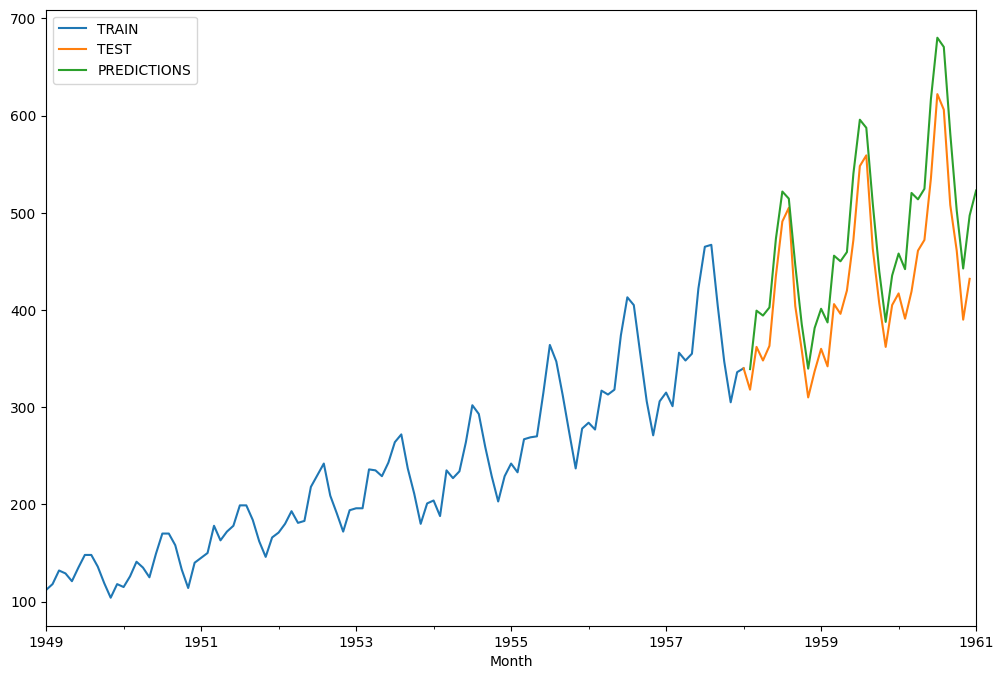

In [61]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTIONS')

<Axes: xlabel='Month'>

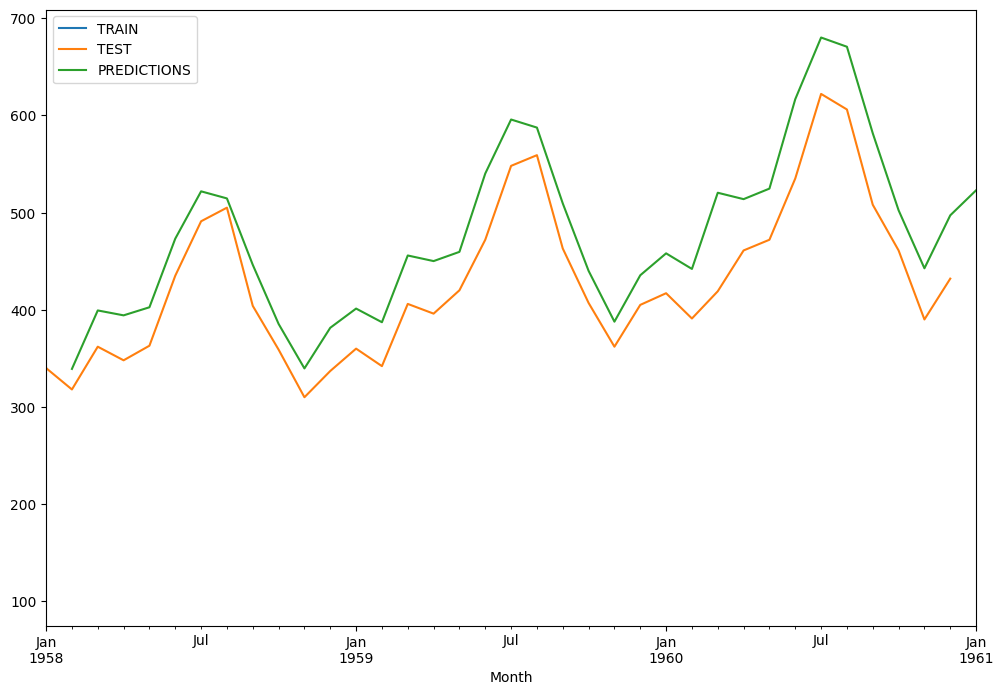

In [62]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTIONS',xlim=['1958-01-01','1961-01-01'])

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
mean_squared_error(test_data,test_predictions)

5614.253528028976

In [65]:
mean_absolute_error(test_data,test_predictions)

63.03110341953485

In [66]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [67]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92832260253113

In [68]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [69]:
forecast_predictions = final_model.forecast(36)

<Axes: xlabel='Month'>

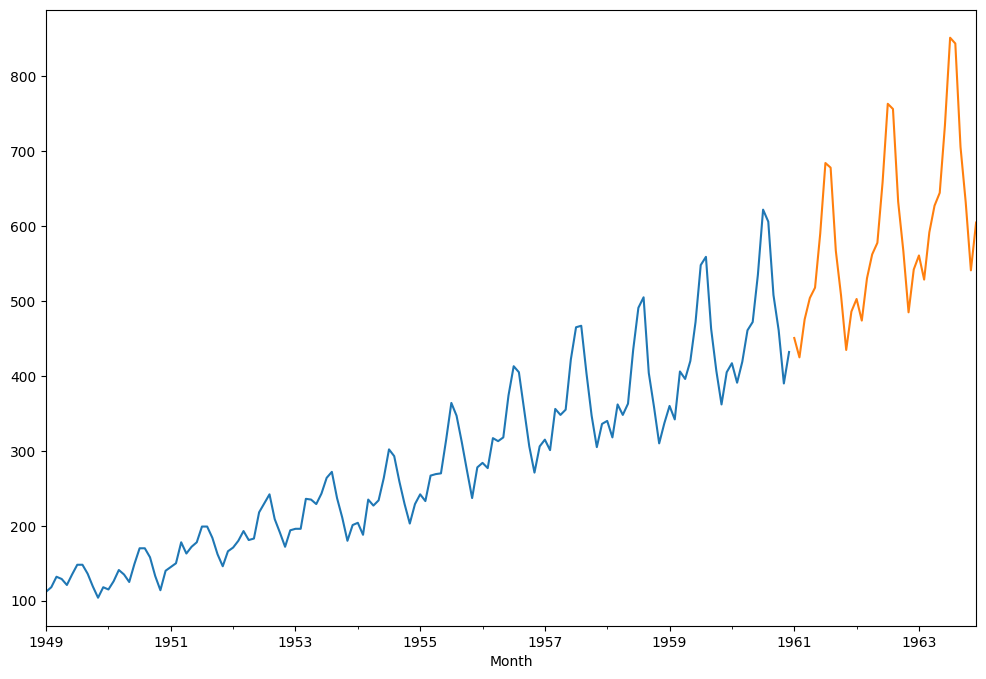

In [70]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [71]:
df2 = pd.read_csv('/content/sample_data/samples.csv',index_col = 0, parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


In [72]:
#stationary data does not exhibits trends and seasonality

<Axes: >

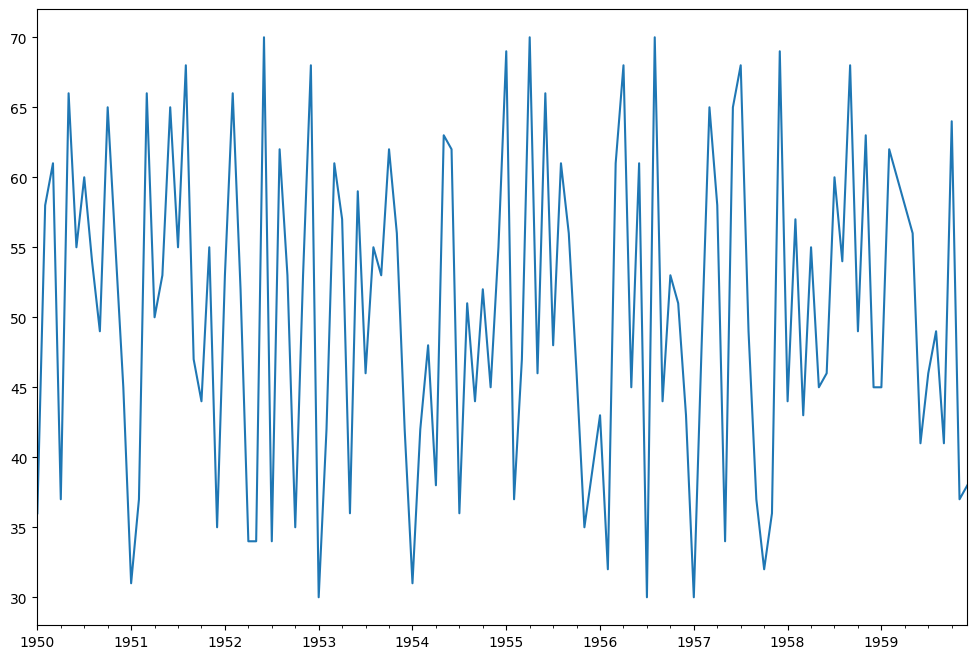

In [73]:
df2['a'].plot(figsize=(12,8))

<Axes: >

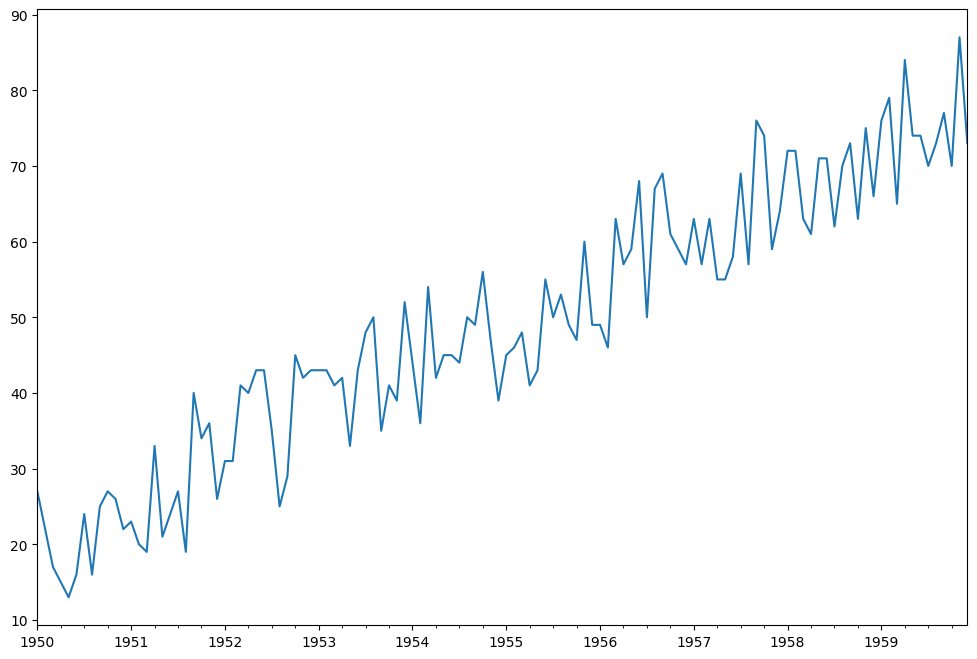

In [74]:
#non stationary data shows either trend, or seasonality or both
df2['b'].plot(figsize=(12,8))

In [75]:
from statsmodels.tsa.statespace.tools import diff
#calculating 1st order difference

# df2['b'] - df2['b'].shift(1)

diff(df2['b'],k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

<Axes: >

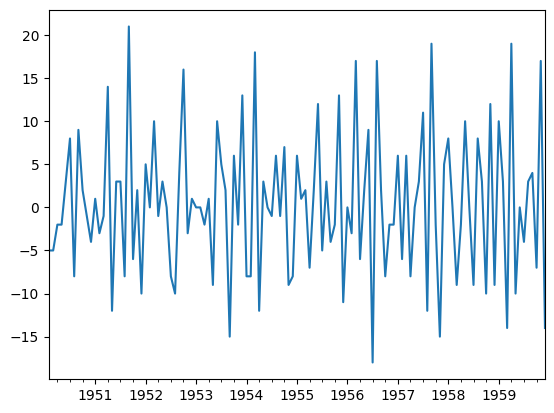

In [76]:
diff(df2['b'],k_diff=1).plot()

# ACF = Auto Correlation Function & PACF = Partial Auto Correlation Function

In [77]:
#correlation is the measure of strength of linear relationship between two variables

In [78]:
#Autocorrelation Plot : Correlogram- shows the correlation of the series itself, lagged by x time units.
#Y axis- Correlation, X axis- number of time units of lag

In [79]:
#PACF = Previous day residuals vs the real values of the current days
#generally partial auto correlation drops off quite quickly.

In [80]:
import statsmodels.api as sm

In [81]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [82]:
#non stationary

df1 = pd.read_csv('/content/sample_data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

In [83]:
#Stationary

df2 = pd.read_csv('/content/sample_data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [84]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [85]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.DataFrame({'a':[13,5,11,12,9]})

In [88]:
df

,a
0,13
1,5
2,11
3,12
4,9


In [89]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [90]:
pacf_yw(df['a'],nlags=4,method='mle') # mle = maximum likelyhood estimation- biased coefficient

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [91]:
pacf_yw(df['a'],nlags=4,method='adjusted') # unbiased coefficient #yaw-walker equation

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [92]:
pacf_ols(df['a'],nlags=2)

array([ 1.        , -0.49677419, -0.43181818])

In [93]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

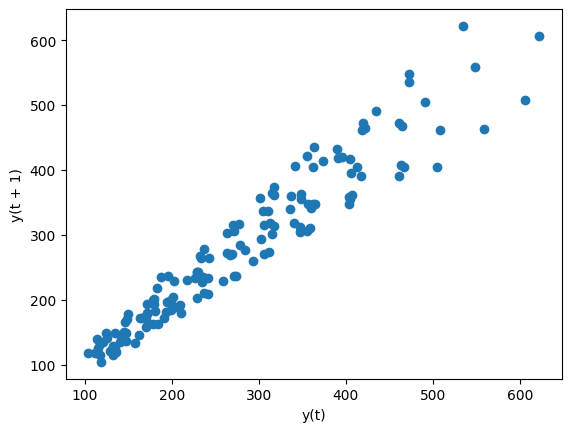

In [94]:
lag_plot(df1['Thousands of Passengers'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

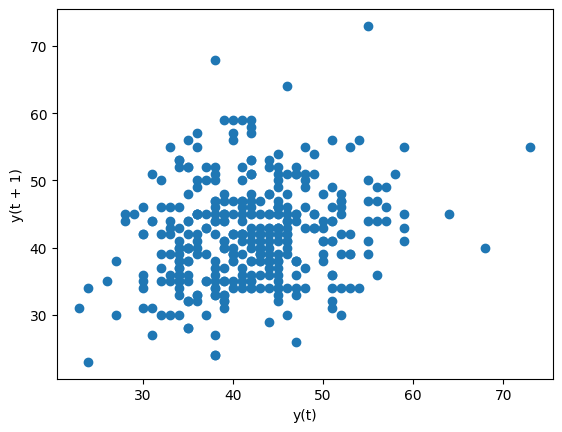

In [96]:
lag_plot(df2['Births'])

In [97]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

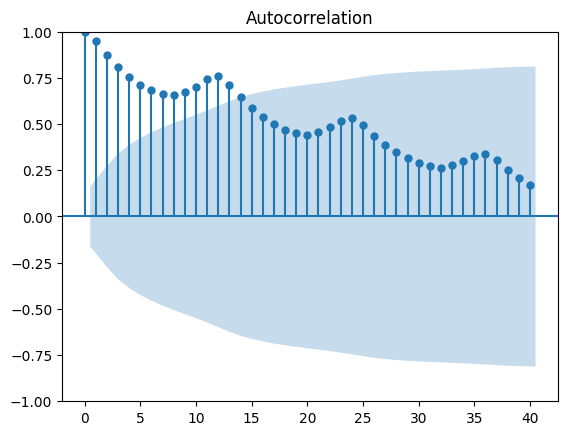

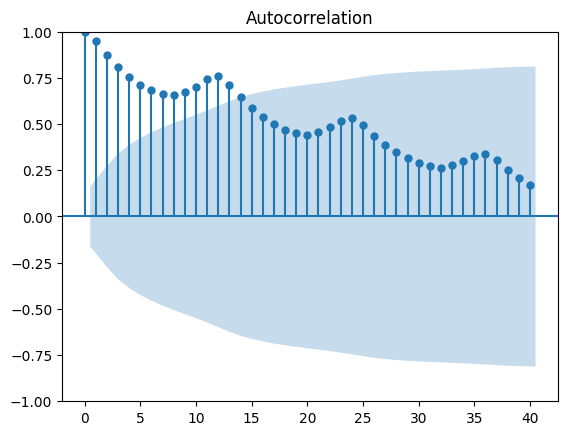

In [98]:
plot_acf(df1,lags=40) #shaded region : 95% confidance interval

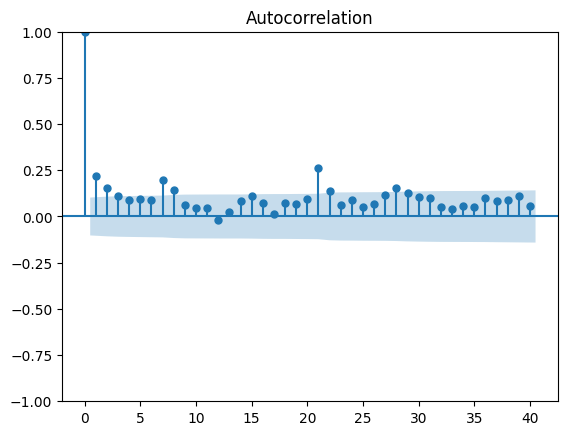

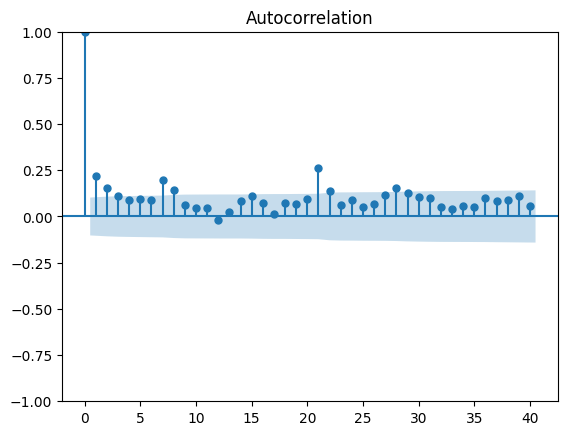

In [99]:
plot_acf(df2,lags=40)

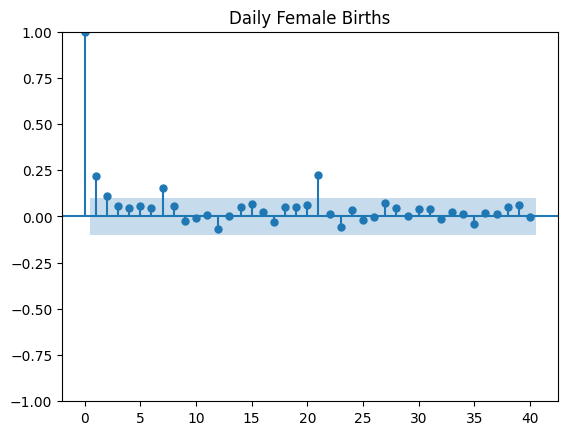

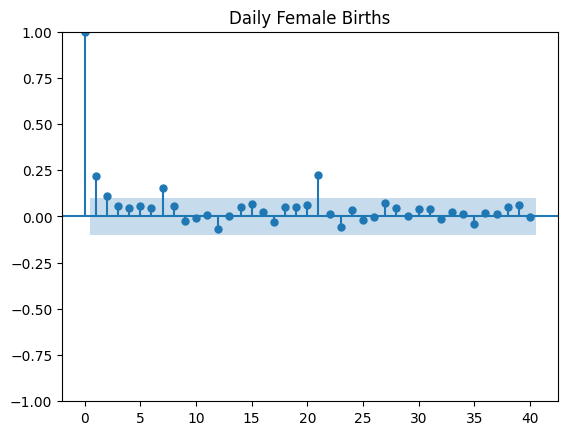

In [100]:
#partial auto correlation plots works best when data is already stationary
plot_pacf(df2,lags=40,title='Daily Female Births')